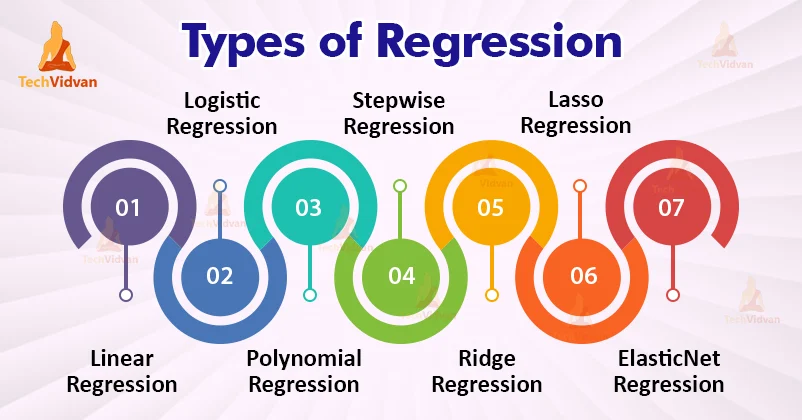

<div class="alert alert-info">
    <h1><strong>Introduction</strong></h1>
    <p>Regression is a technique used to predict numerical values (continuous output) based on input data. It establishes a mathematical relationship between input variables and a target variable, allowing the model to make predictions for new data points. The goal is to find the best-fit line or curve that represents this relationship and enables accurate predictions. Regression is widely applied in diverse domains, including finance, healthcare, and engineering, to solve prediction and forecasting problems.</p>
    <br>
    <hr><b>Description</b><hr>
    <ui><li>The notebook provides a comprehensive explanation of each regression technique, covering theory, equations, and practical implementation.</li></ui>
    
</div>



# 📦 Importing Dependencies


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

<div class="alert alert-white">
  <h1><strong>Linear Regression</strong></h1>
  <ui class="cless">
    <li>A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term).</li>
  </ui>
  
  <h2>Linear Regression model prediction:</h2>
    
  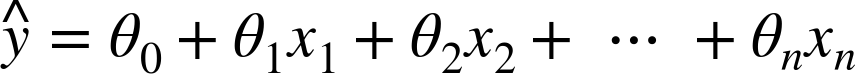

  <ui class="cless">
    <li>ŷ is the predicted value.</li>
    <li>n is the number of features.</li>
    <li>xi is the ith feature value.</li>
    <li>θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).</li>
  </ui>
    <br>

  <ui class="cless">
    <li>This can be written much more concisely using a vectorized form:</li>
  </ui>
  
  <h2>Linear Regression model prediction (vectorized form)</h2>
    
  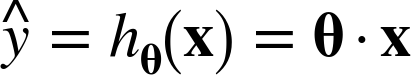
    
  <ui class="cless">
    <li>θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.</li>
    <li>x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.</li>
    <li>θ · x is the dot product of the vectors θ and x, which is of course equal to ŷ.</li>
    <li>hθ is the hypothesis function, using the model parameters θ.</li>
  </ui>
    <br>

  <ui class="cless">
    <li>The Mean Squared Error (MSE) of a Linear Regression hypothesis hθ on a training set X is calculated using:</li>
  </ui>
  
  <h2>MSE cost function for a Linear Regression model</h2>
  
  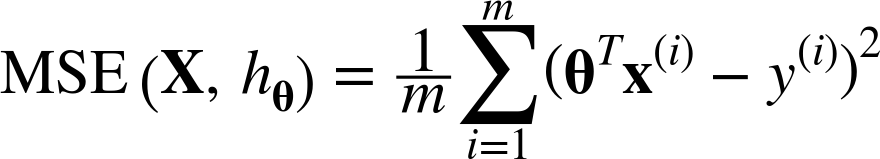
</div>


<div class = "alert alert-warning">
    <h2>Let’s generate some linear-looking data to test this equation</h2>
</div>

In [54]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)

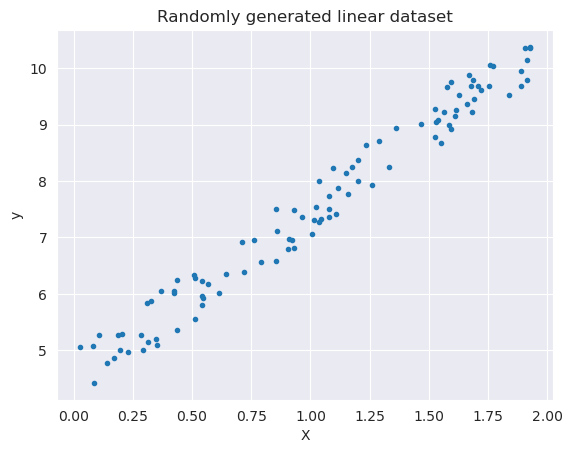

In [55]:
plt.plot(X,y,".")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Randomly generated linear dataset")
plt.show()

<div class="alert alert-warning">
    <h2>Performing Linear Regression using Scikit-Learn is simple</h2>
</div>

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [57]:
X_test = np.array([[0], [2]])
y_pred = lr.predict(X_test)

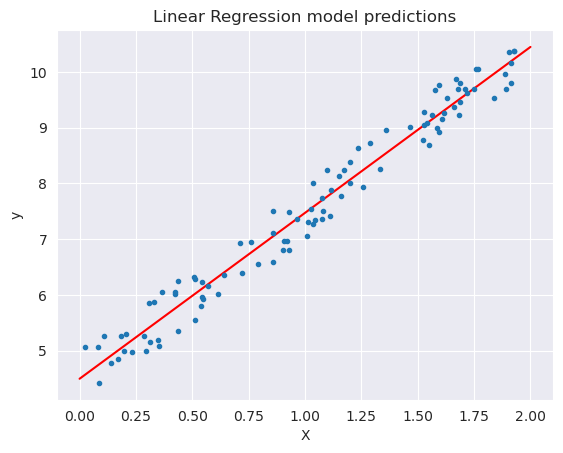

In [58]:
plt.plot(X_test, y_pred,"r-")
plt.plot(X,y,".")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression model predictions")
plt.show()

# Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweakparameters iteratively in order to minimize a cost function.


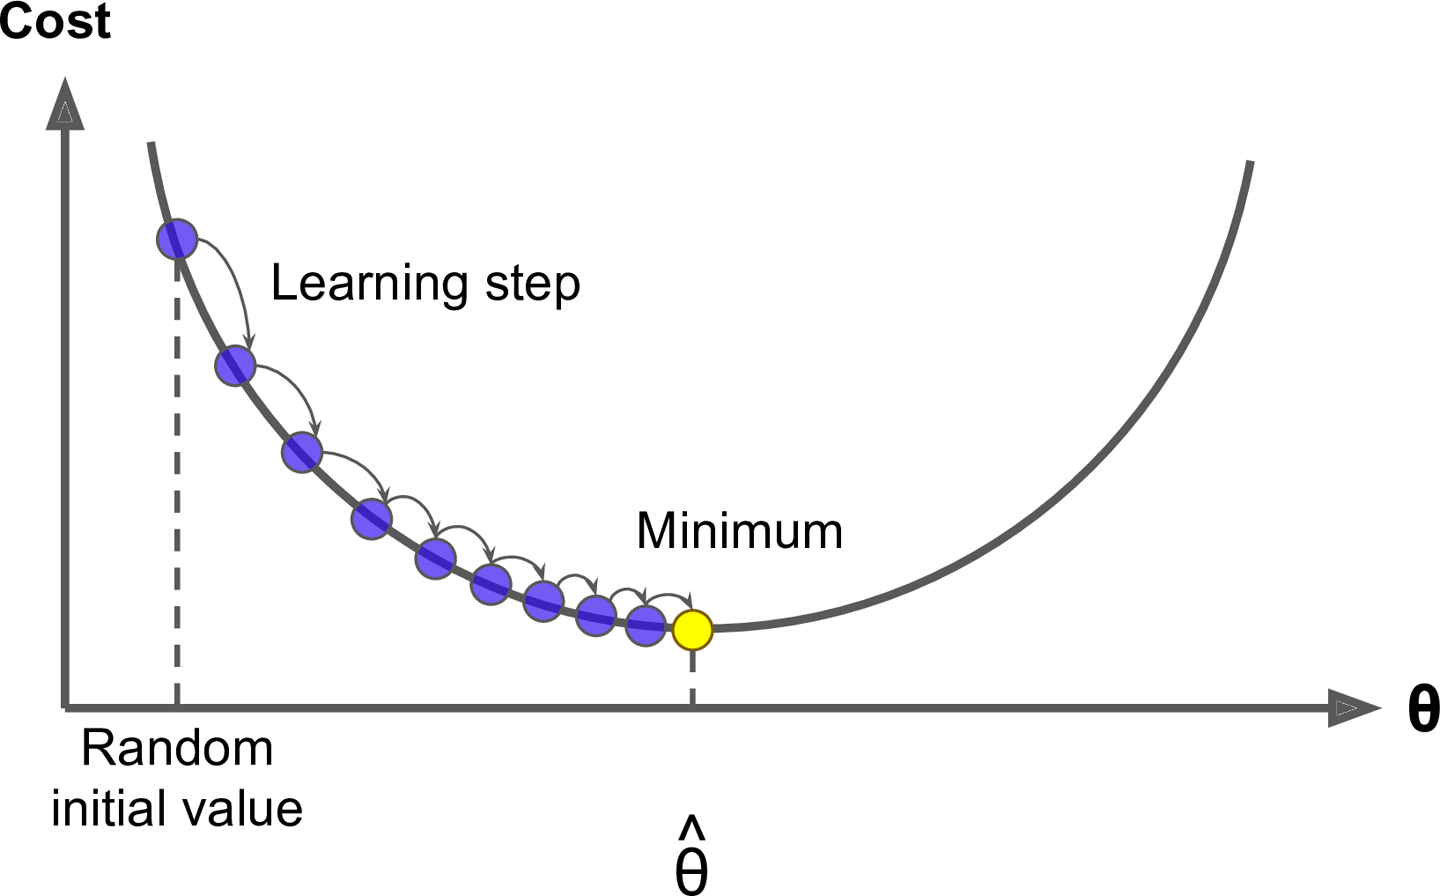


- An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

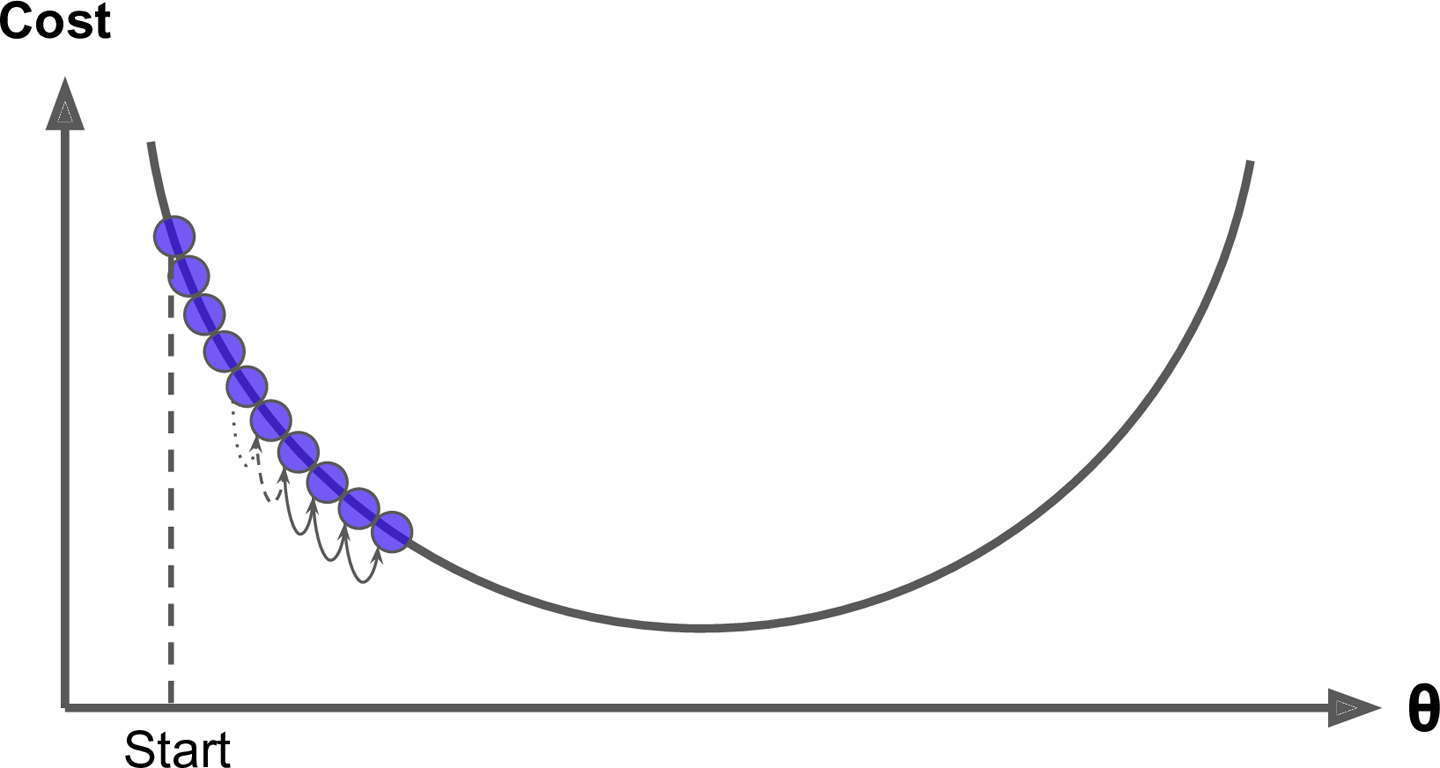

- On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

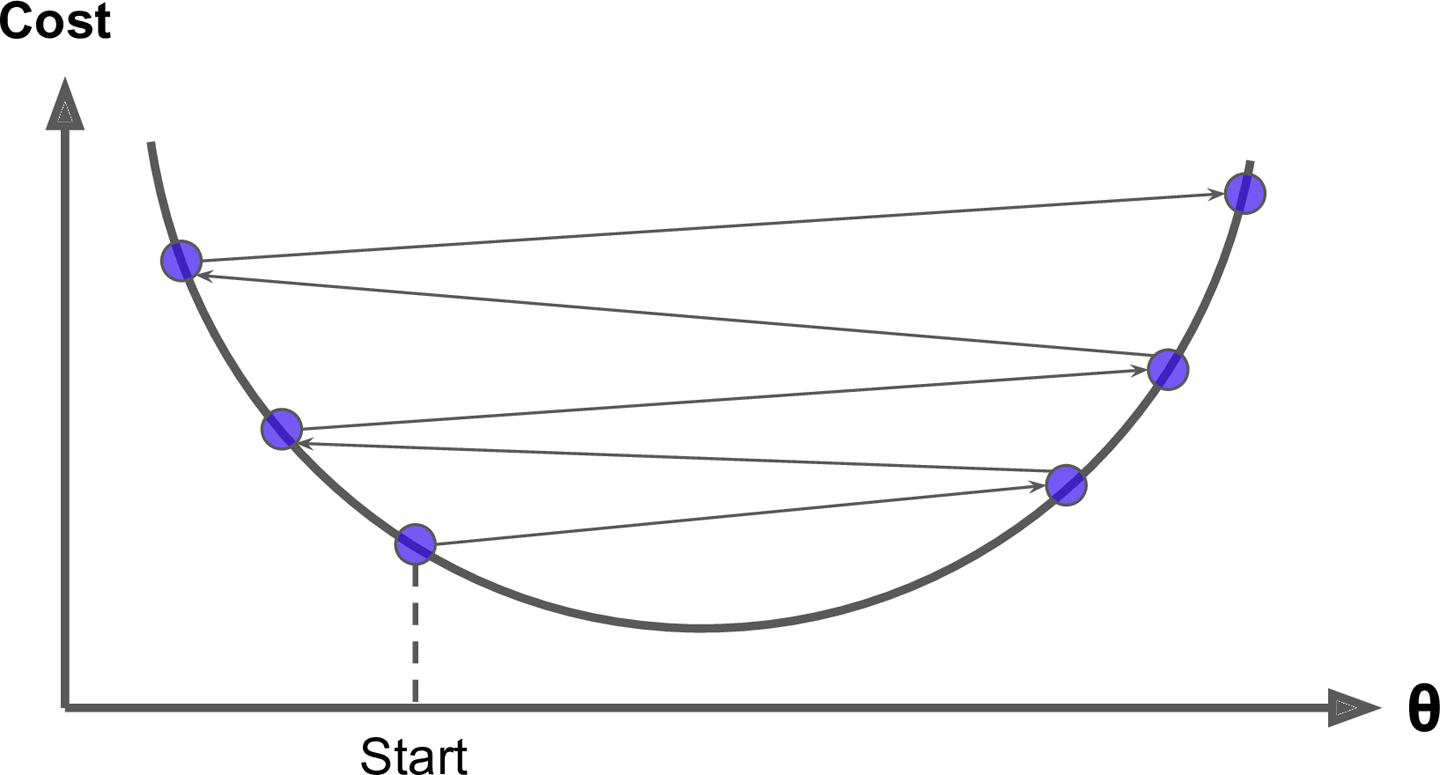

- If the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum.

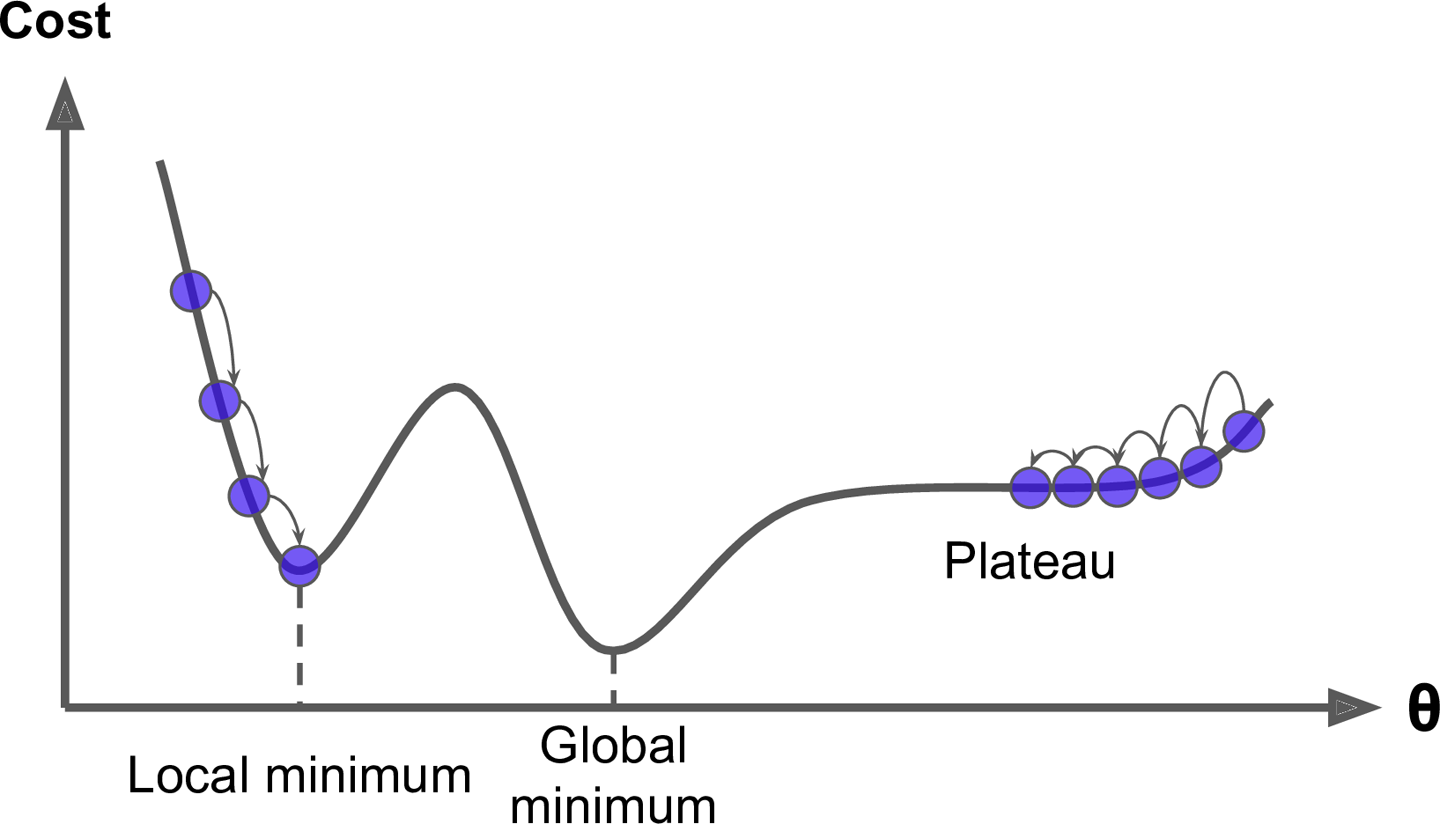


- When using Gradient Descent, you should ensure that all features have a similar scale



## Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative.

- Partial derivatives of the cost function

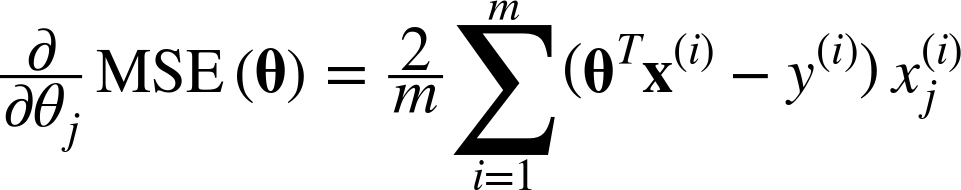

 - Gradient vector of the cost function
 
 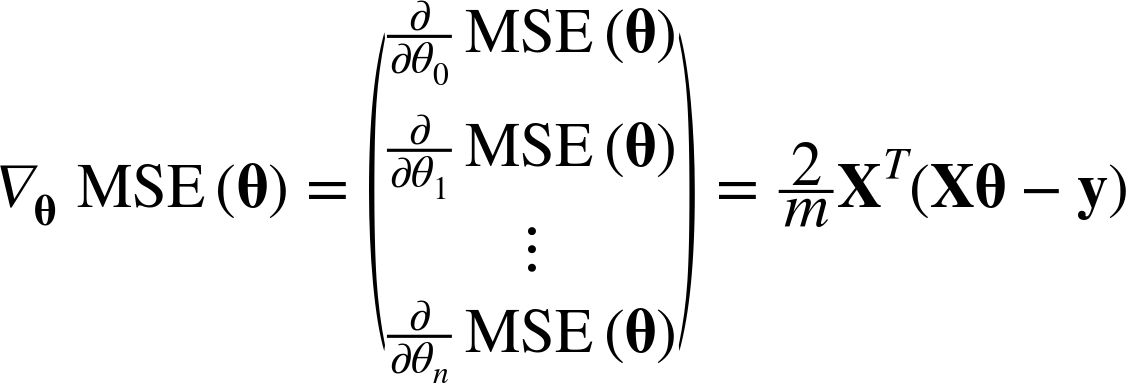
 
This formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent:

- Gradient Descent step

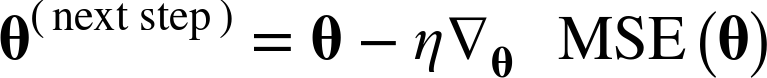

It uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets

## Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance
-  With Stochastic Gradient Descent, each training step is much faster but also much more stochastic than when using Batch Gradient Descent
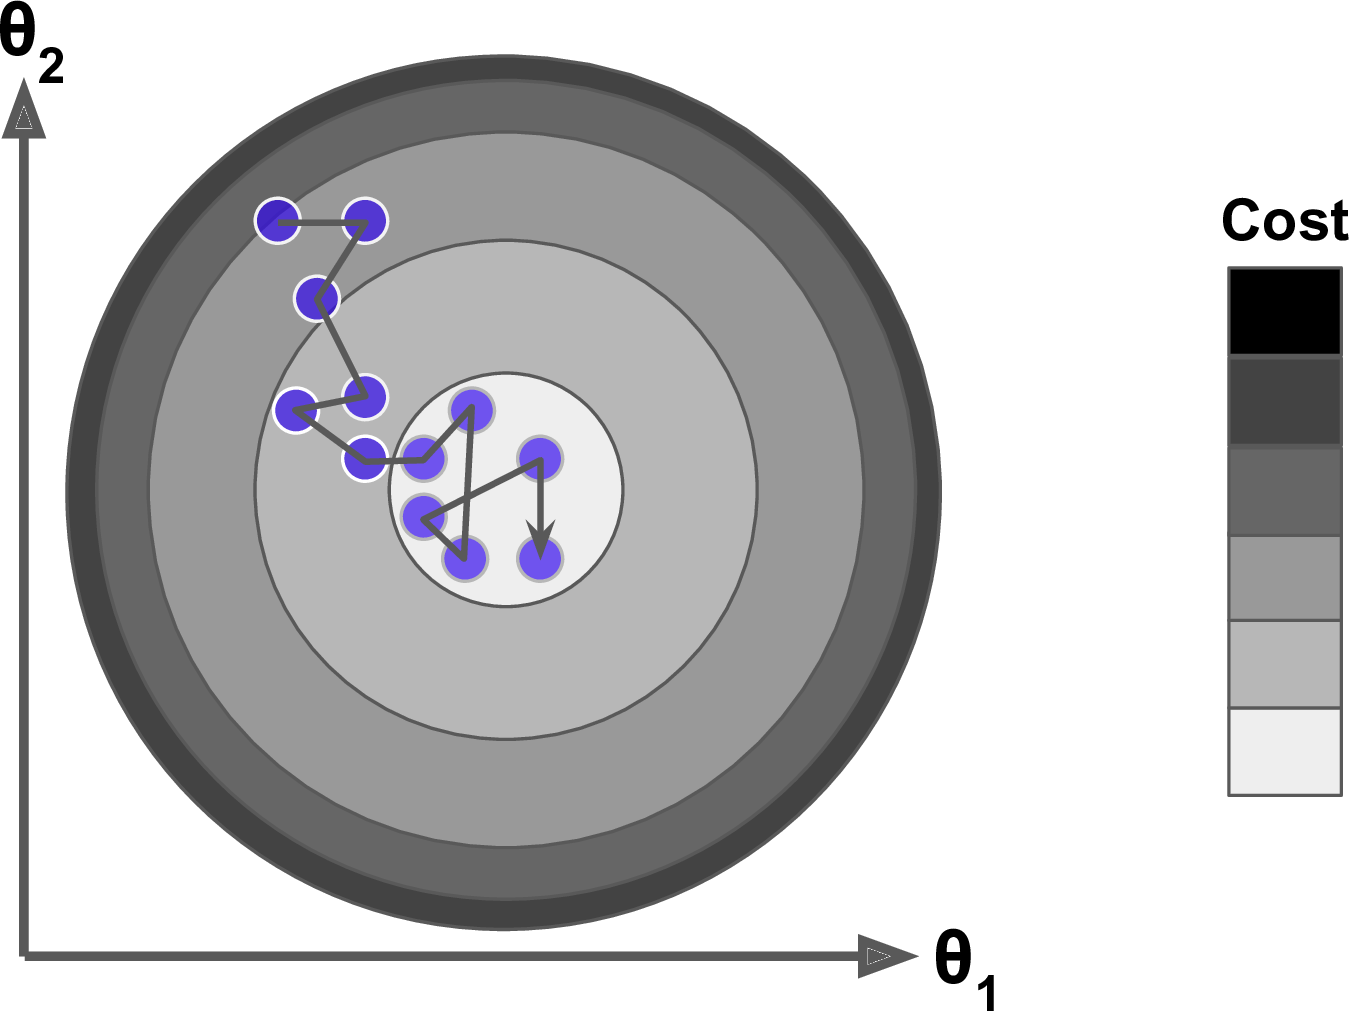

## Mini-batch Gradient Descent
Once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.


In [59]:

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Batch Gradient Descent
batch_sgd = SGDRegressor(learning_rate='constant', eta0=0.01, random_state=42, max_iter=100, tol=1e-3)

# Mini-batch Gradient Descent
batch_size = 32
n_iterations = len(X_train) // batch_size
mini_batch_sgd = SGDRegressor(learning_rate='constant', eta0=0.01, random_state=42, max_iter=100, tol=1e-3)

# Stochastic Gradient Descent
stochastic_sgd = SGDRegressor(learning_rate='constant', eta0=0.01, random_state=42, max_iter=100, tol=1e-3)

# Batch Gradient Descent
batch_sgd.fit(X_train, y_train)

# Mini-batch Gradient Descent
for epoch in range(100):  # Number of epochs
    indices = np.random.permutation(len(X_train))
    for i in range(n_iterations):
        batch_indices = indices[i * batch_size: (i + 1) * batch_size]
        mini_batch_sgd.partial_fit(X_train[batch_indices], y_train[batch_indices])

# Stochastic Gradient Descent
for _ in range(100):  # Number of epochs
    for i in range(len(X_train)):
        stochastic_sgd.partial_fit(X_train[i:i + 1], y_train[i:i + 1])

# Evaluation
print("Batch Gradient Descent - Coefficients:", batch_sgd.coef_)
print("Mini-batch Gradient Descent - Coefficients:", mini_batch_sgd.coef_)
print("Stochastic Gradient Descent - Coefficients:", stochastic_sgd.coef_)
print("Batch Gradient Descent - Test MSE:", np.mean((batch_sgd.predict(X_test) - y_test) ** 2))
print("Mini-batch Gradient Descent - Test MSE:", np.mean((mini_batch_sgd.predict(X_test) - y_test) ** 2))
print("Stochastic Gradient Descent - Test MSE:", np.mean((stochastic_sgd.predict(X_test) - y_test) ** 2))


Batch Gradient Descent - Coefficients: [3.03109116]
Mini-batch Gradient Descent - Coefficients: [2.95128849]
Stochastic Gradient Descent - Coefficients: [2.93950464]
Batch Gradient Descent - Test MSE: 6.367193638352744
Mini-batch Gradient Descent - Test MSE: 6.201397832840116
Stochastic Gradient Descent - Test MSE: 6.182151755334533


## **Gradient Descent with various learning rates**

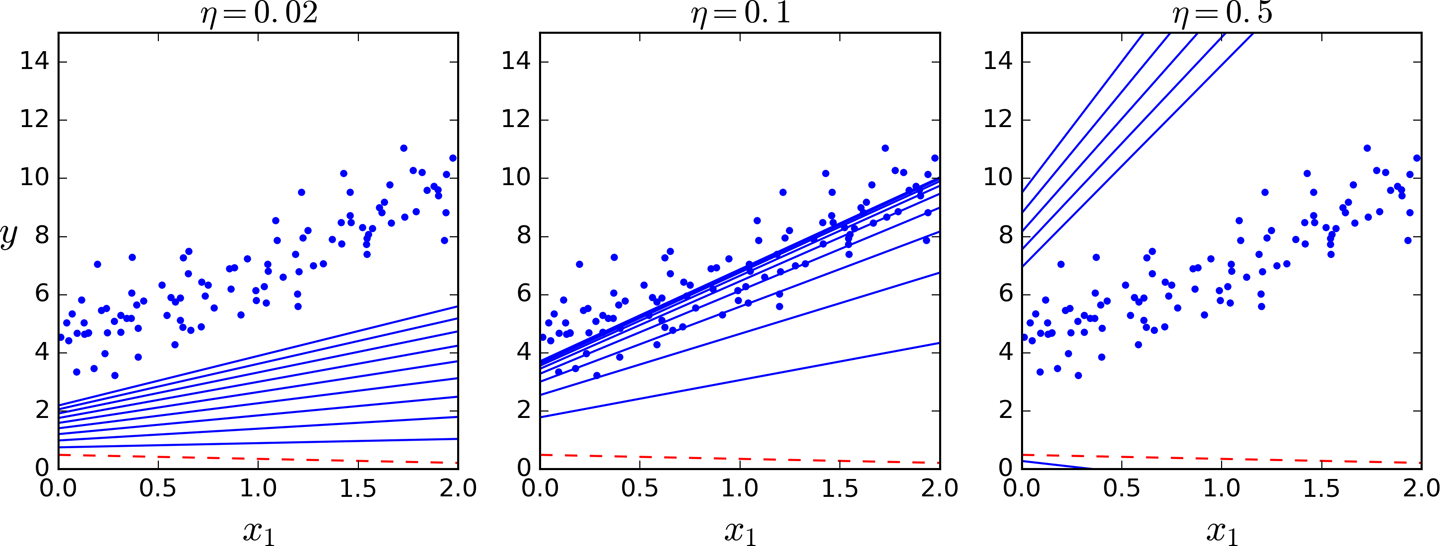

## **The first 20 steps of Stochastic Gradient Descent**

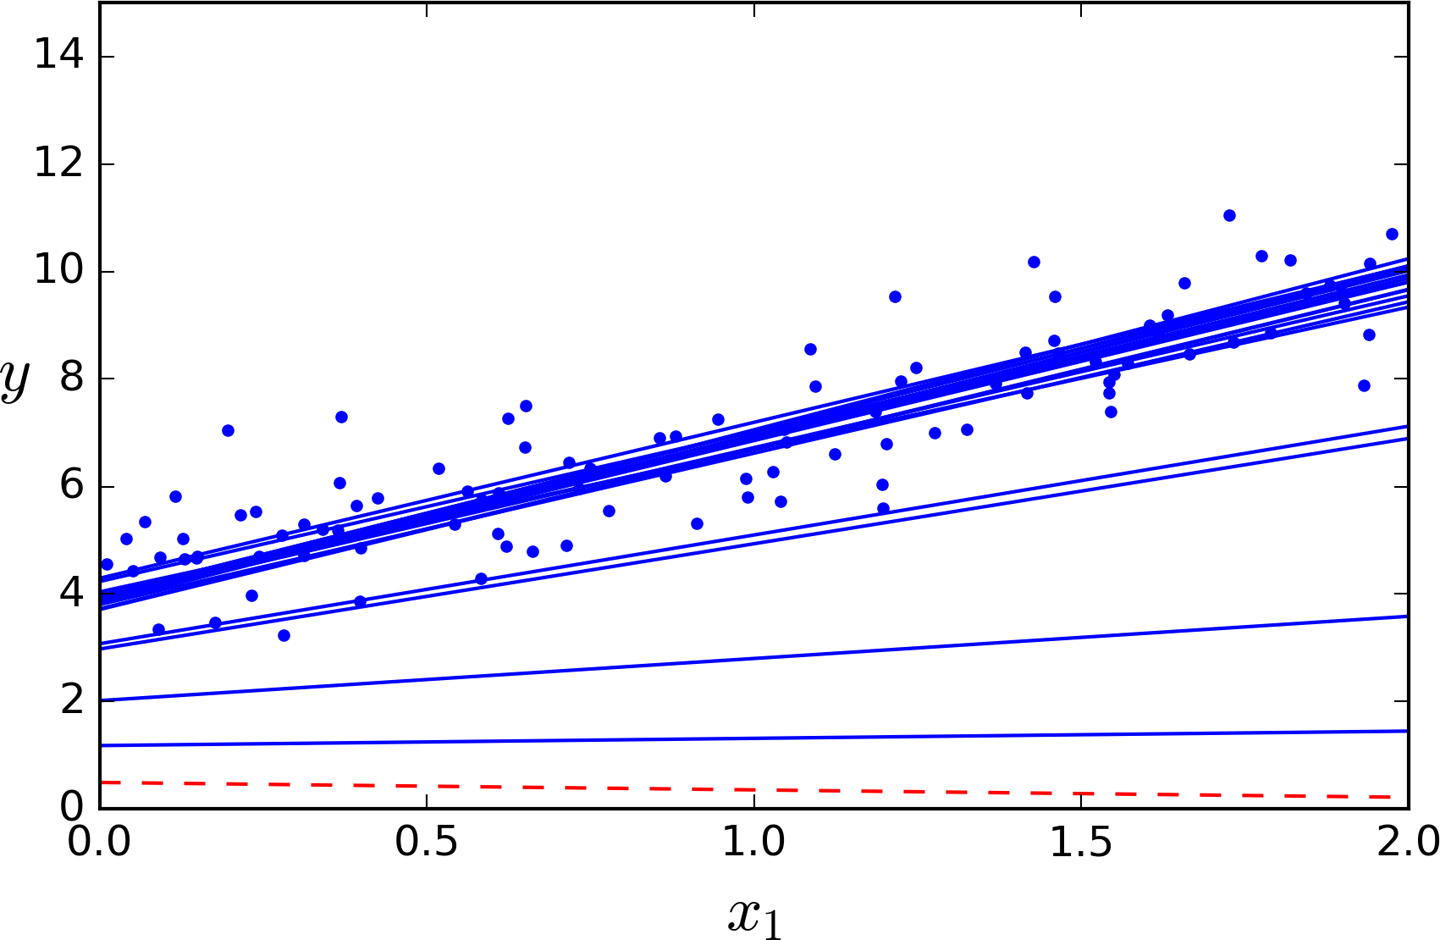

## **Gradient Descent paths in parameter space**
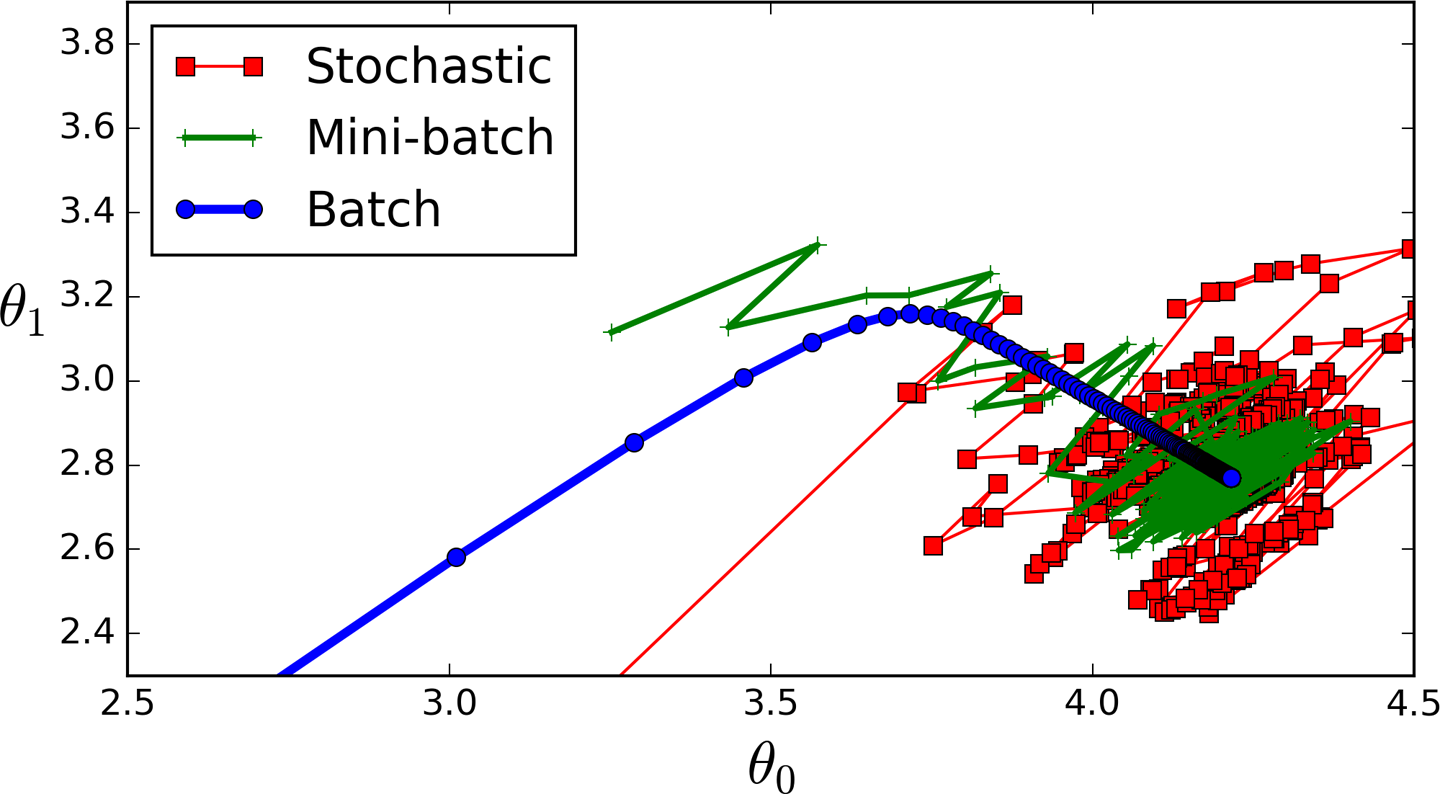



<div class = "alert alert-warning">
    <h2>Comparison of algorithms for Linear Regression</h2>
</div>

In [60]:
import pandas as pd

data = {
    'Algorithm': ['Normal Equation', 'SVD', 'LinearRegression', 'SGDRegressor', 'SGDRegressor'],
    'Large m': ['Fast', 'Fast', 'Slow', 'Fast', 'Fast'],
    'Out-of-core support': ['No', 'No', 'No', 'Yes', 'Yes'],
    'Large n': ['Slow', 'Slow', 'Fast', 'Fast', 'Fast'],
    'Hyperparams': [0, 0, 2, '≥2', '≥2'],
    'Scaling required': ['No', 'No', 'Yes', 'Yes', 'Yes'],
    'Scikit-Learn': ['n/a', 'n/a', 'n/a', 'SGDRegressor', 'SGDRegressor']
}

df = pd.DataFrame(data)
df

Algorithm Large m Out-of-core support Large n Hyperparams  \
0   Normal Equation    Fast                  No    Slow           0   
1               SVD    Fast                  No    Slow           0   
2  LinearRegression    Slow                  No    Fast           2   
3      SGDRegressor    Fast                 Yes    Fast          ≥2   
4      SGDRegressor    Fast                 Yes    Fast          ≥2   

  Scaling required  Scikit-Learn  
0               No           n/a  
1               No           n/a  
2              Yes           n/a  
3              Yes  SGDRegressor  
4              Yes  SGDRegressor

<div class="alert alert-info">
    <h1>Polynomial Regression</h1>

<p>What if your data is more complex than a straight line? Surprisingly, you can use a
linear model to fit nonlinear data. A simple way to do this is to add powers of each
feature as new features, then train a linear model on this extended set of features. This
    technique is called Polynomial Regression.</p>

<ui><li>let’s generate some nonlinear data, based on a simple quadratic equation</li></ui>
</div>

In [61]:
m = 100
X = 6 * np.random.rand(m, 1) - 3

y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

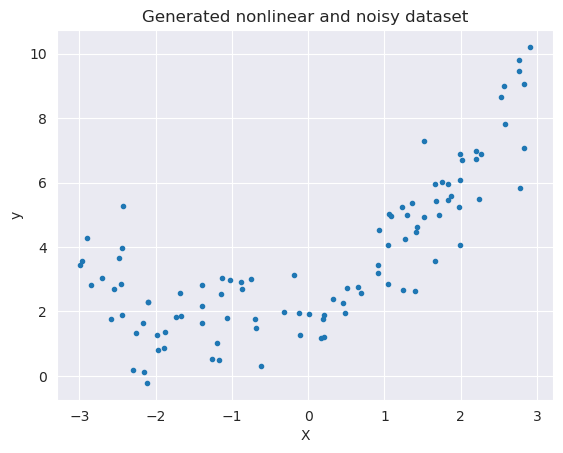

In [62]:
plt.plot(X,y,".")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated nonlinear and noisy dataset")
plt.show()

<div class = "alert alert-warning">
    <p>Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (seconddegree polynomial) of each feature in the training set as a new feature (in this case
        there is just one feature):</p>
</div>

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)

<div class = "alert alert-info">
    <p>X_poly now contains the original feature of X plus the square of this feature. Now you
        can fit a LinearRegression model to this extended training data</p>
</div>

In [64]:
lr=LinearRegression()
lr.fit(X_poly,y)

LinearRegression()

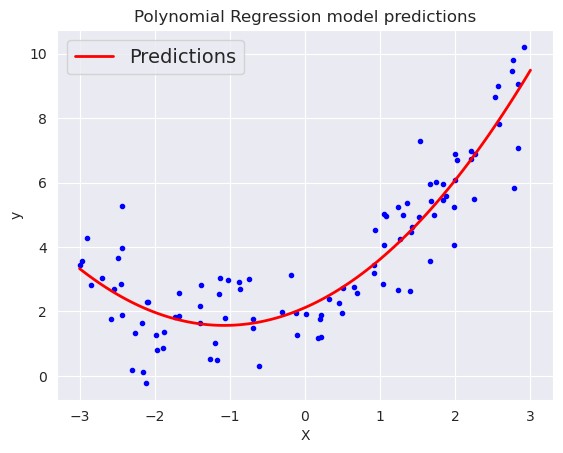

In [65]:
X_test=np.linspace(-3, 3, 100).reshape(100, 1)
X_test_poly = poly.transform(X_test)
y_pred = lr.predict(X_test_poly)


plt.plot(X, y, "b.")
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression model predictions")
plt.legend(loc="upper left", fontsize=14)

plt.show()

<div class = "alert alert-warning">
<ui><li>Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree</li></ui>

<ui><li>PolynomialFeatures(degree=d) transforms an array containing n_features into an array containing (n + d)! / d!n! features, where n! is the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!</li></ui>
</div>


  # Learning Curves: Plain Linear Regression Model
  
  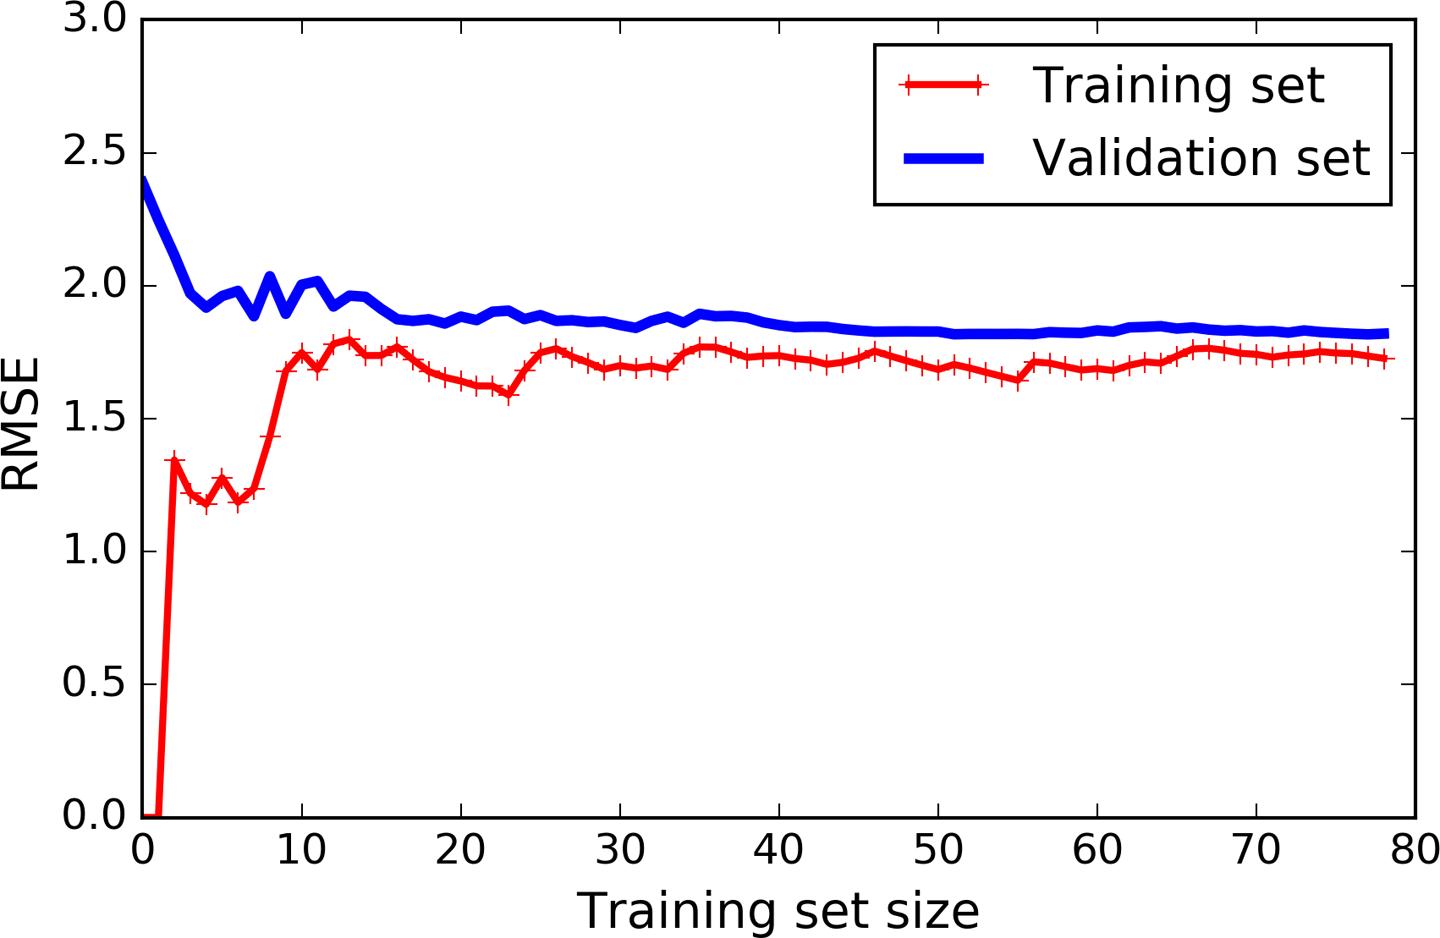
  
  # Learning Curves: 10th-Degree Polynomial Model
  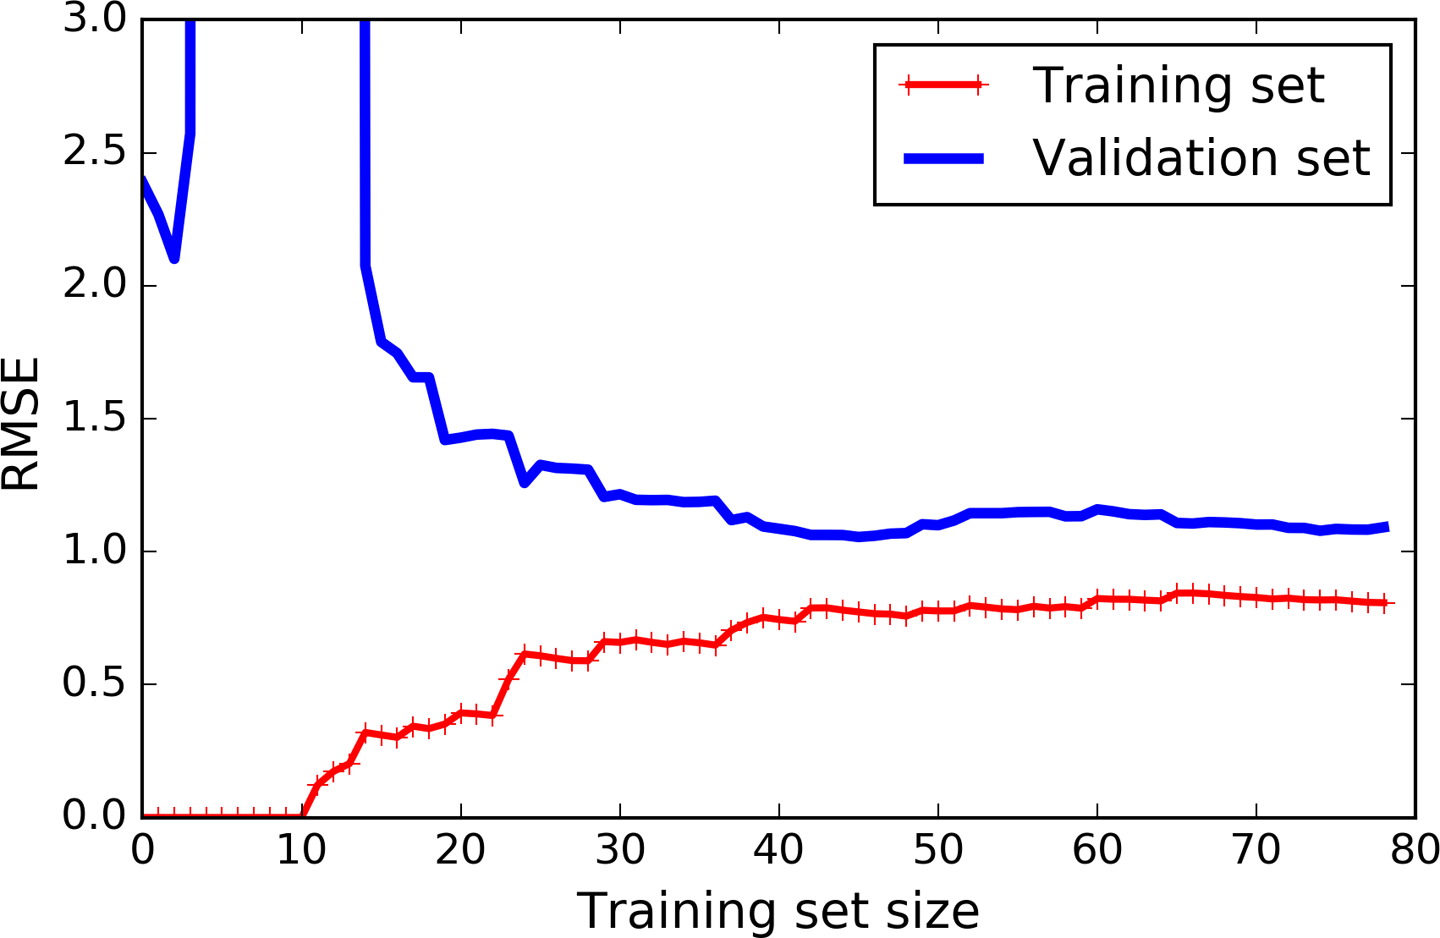
  

  - The error on the training data is much lower than with the Linear Regression model.
  - There is a gap between the curves, indicating significant overfitting. More training data might help reduce this gap.

  An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:

  ## Bias
  This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

  ## Variance
  This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

  ## Irreducible Error
  This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

  Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.



# Ridge Regression

- Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression.A regularization term equal to  is added to the cost function.
- This forces the learning algorithm to not only fit the data but also keep the modelweights as small as possible

- Ridge Regression cost function
 
 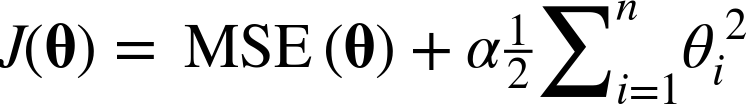
 
 

In [69]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [70]:
from sklearn.linear_model import Ridge


In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.90131402]])

In [72]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.90130832]])

In [73]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.84397933])

### A linear model (left) and a polynomial model (right), both with various lev‐els of Ridge regularization:
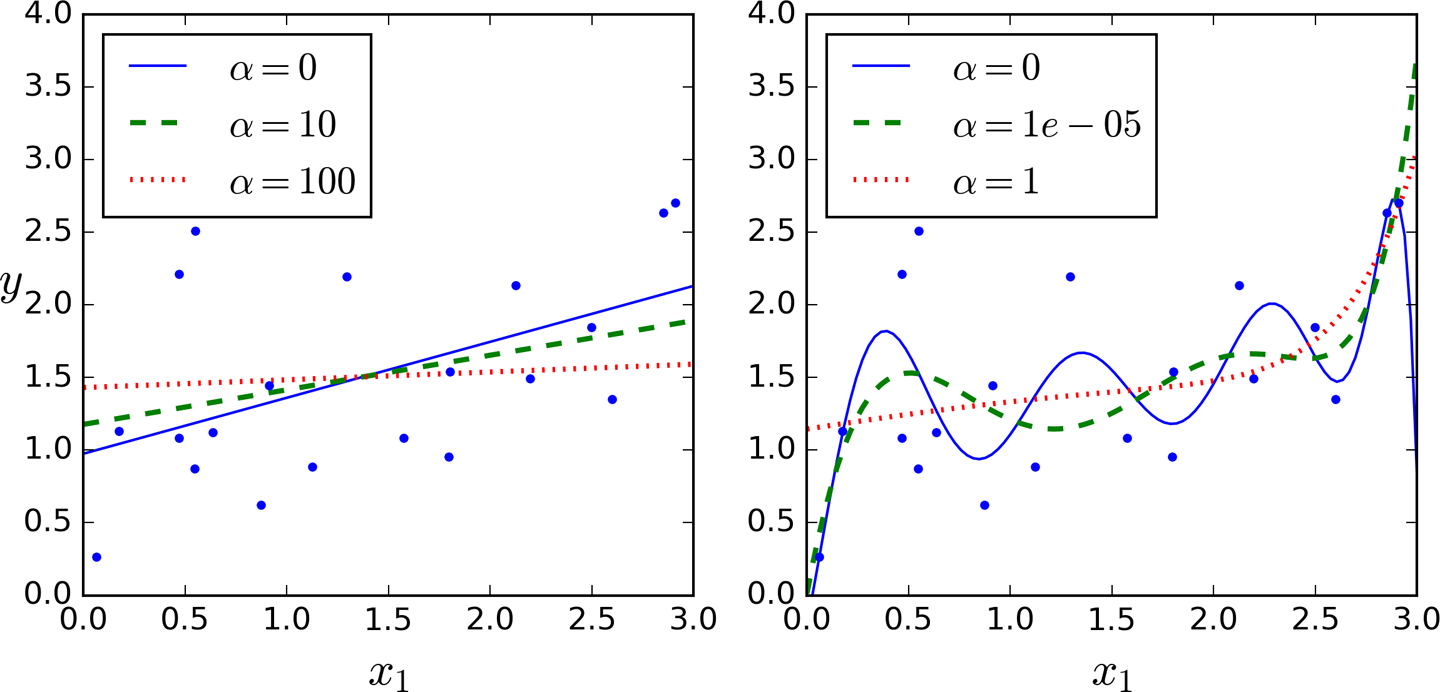

# Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm 
 
 
- Lasso Regression cost function
 
 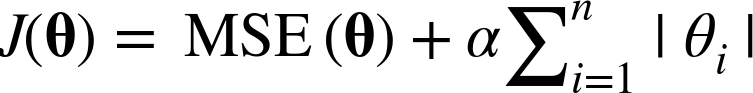
 

In [74]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.91277692])

### A linear model (left) and a polynomial model (right), both using various levels of Lasso regularization:

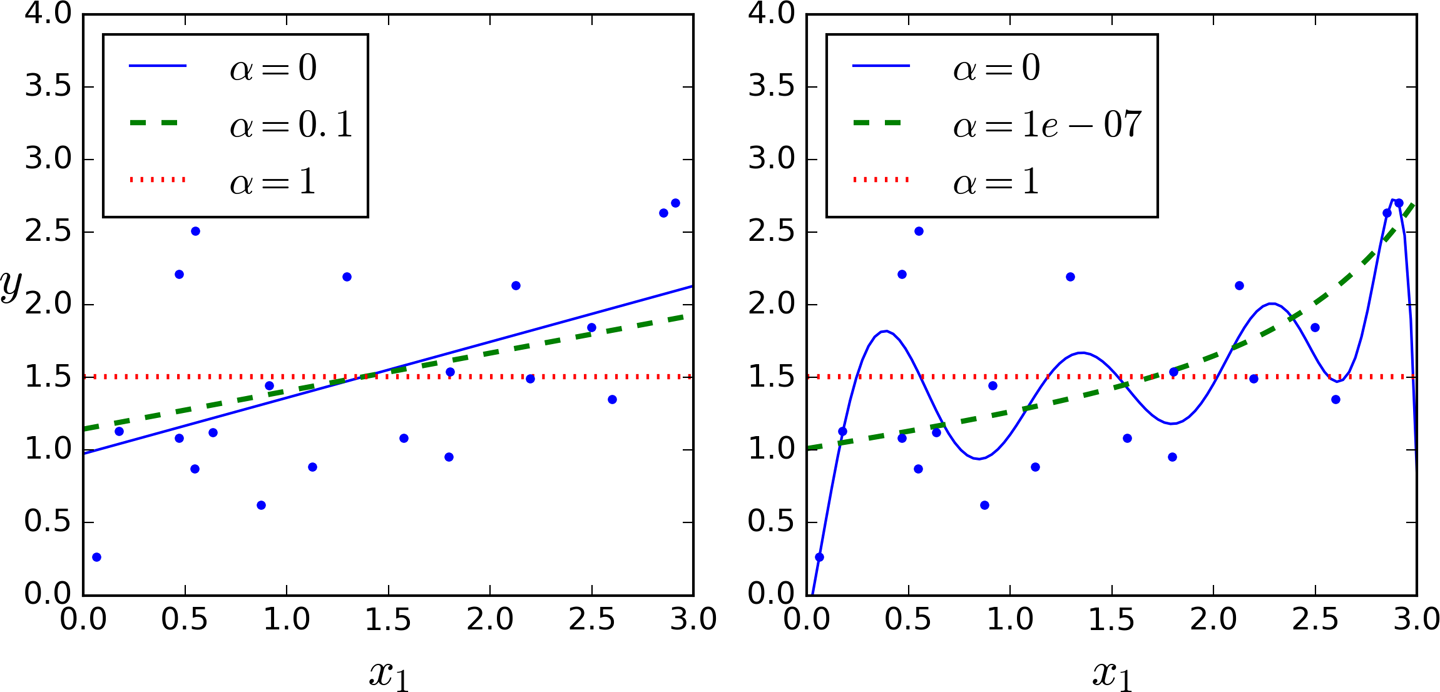

## Lasso versus Ridge regularization
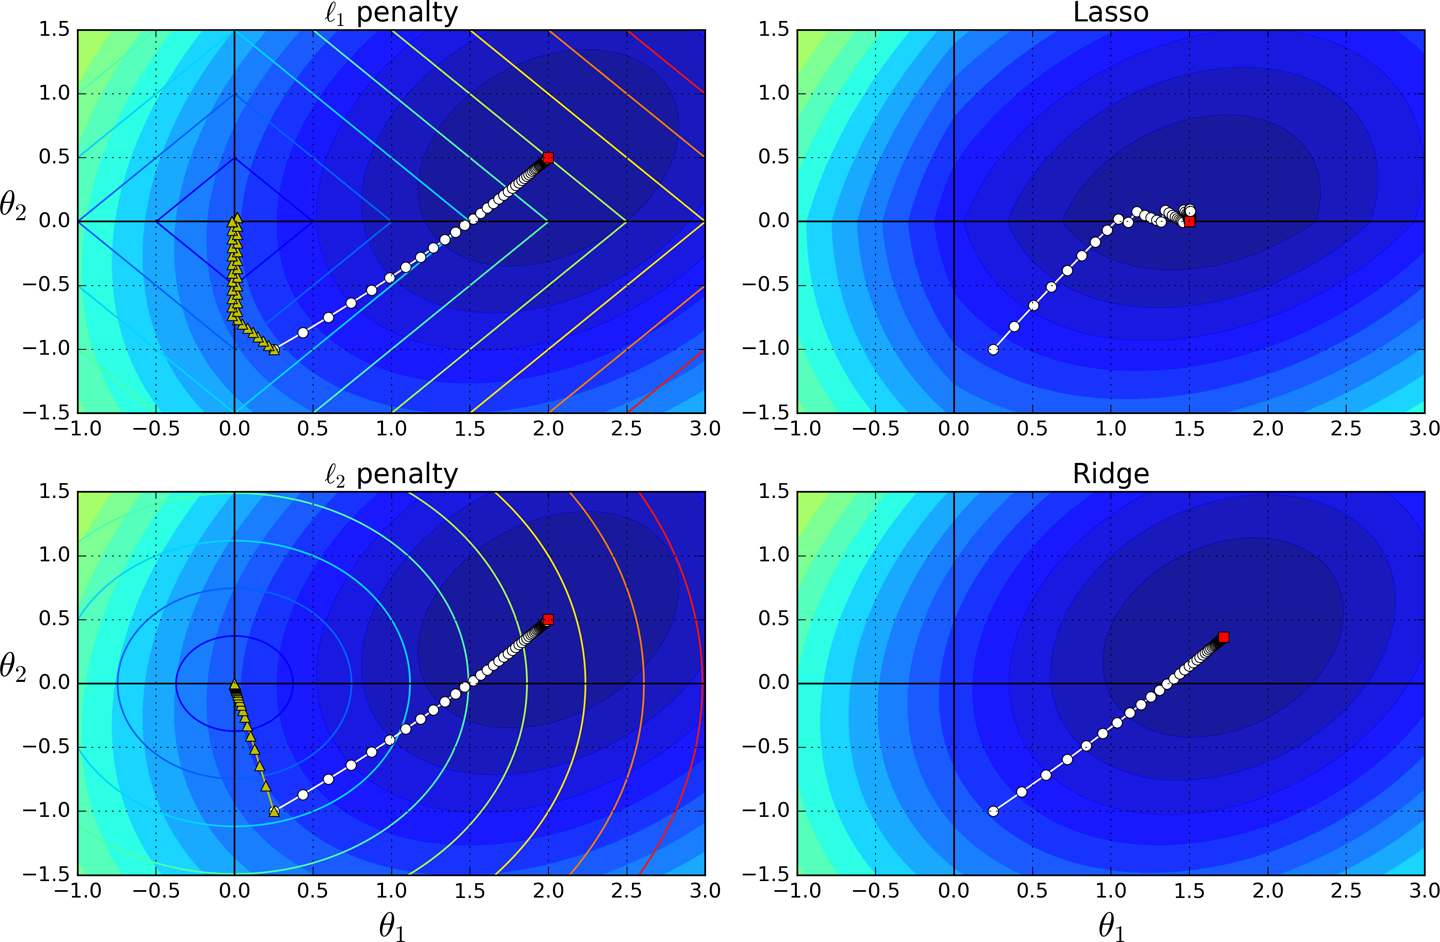

# Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

- Elastic Net cost function
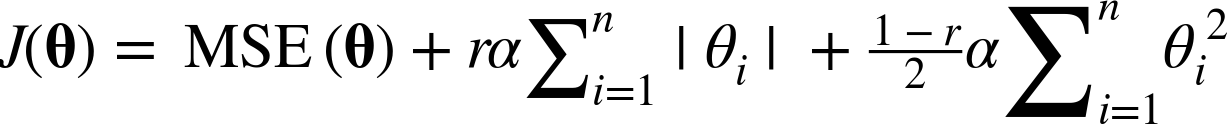


In [75]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.90974244])

# Logistic Regression
Some regression algorithms can be used for classification (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

- Logistic Regression model estimated probability (vectorized form)

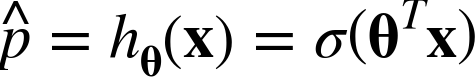

- The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.

    - Logistic function


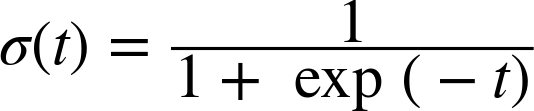

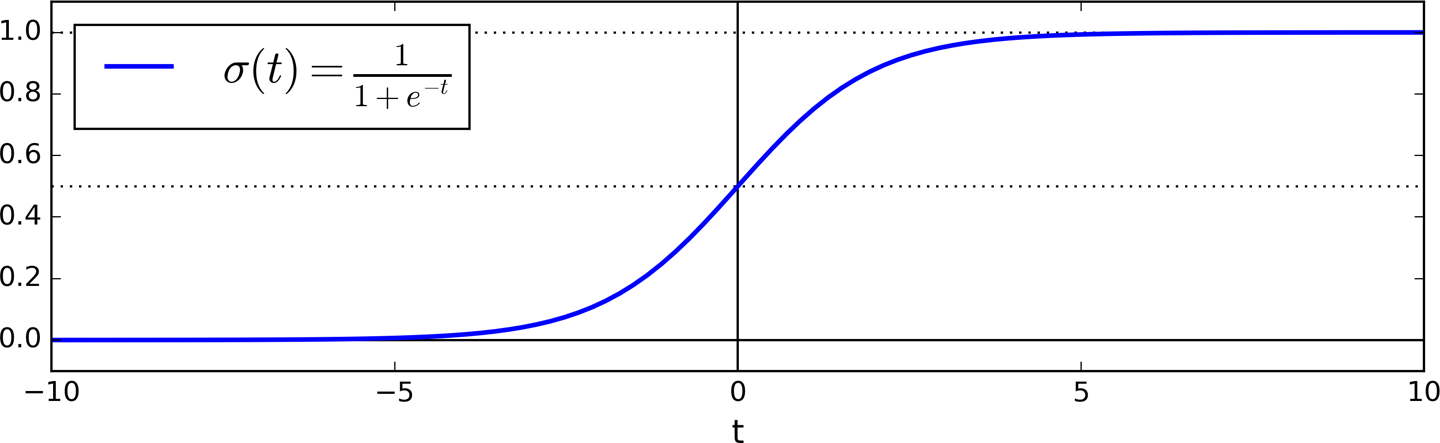


- Logistic Regression cost function (log loss)

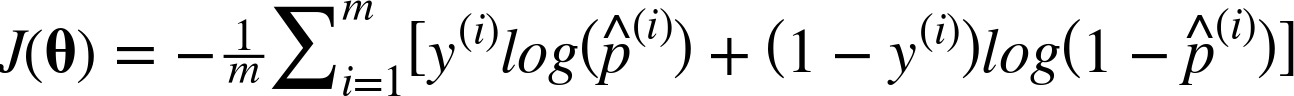

The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).

- Logistic cost function partial derivatives

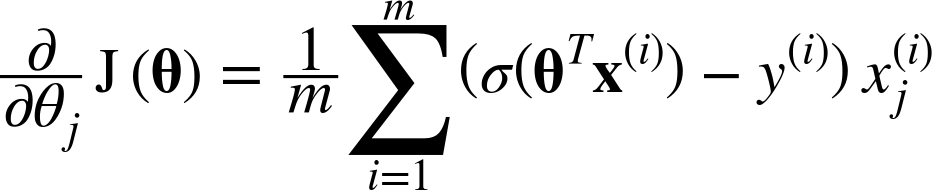

<div class = "alert alert-info">
<h1>Decision Boundaries</h1>

<p>Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica</p>
</div>

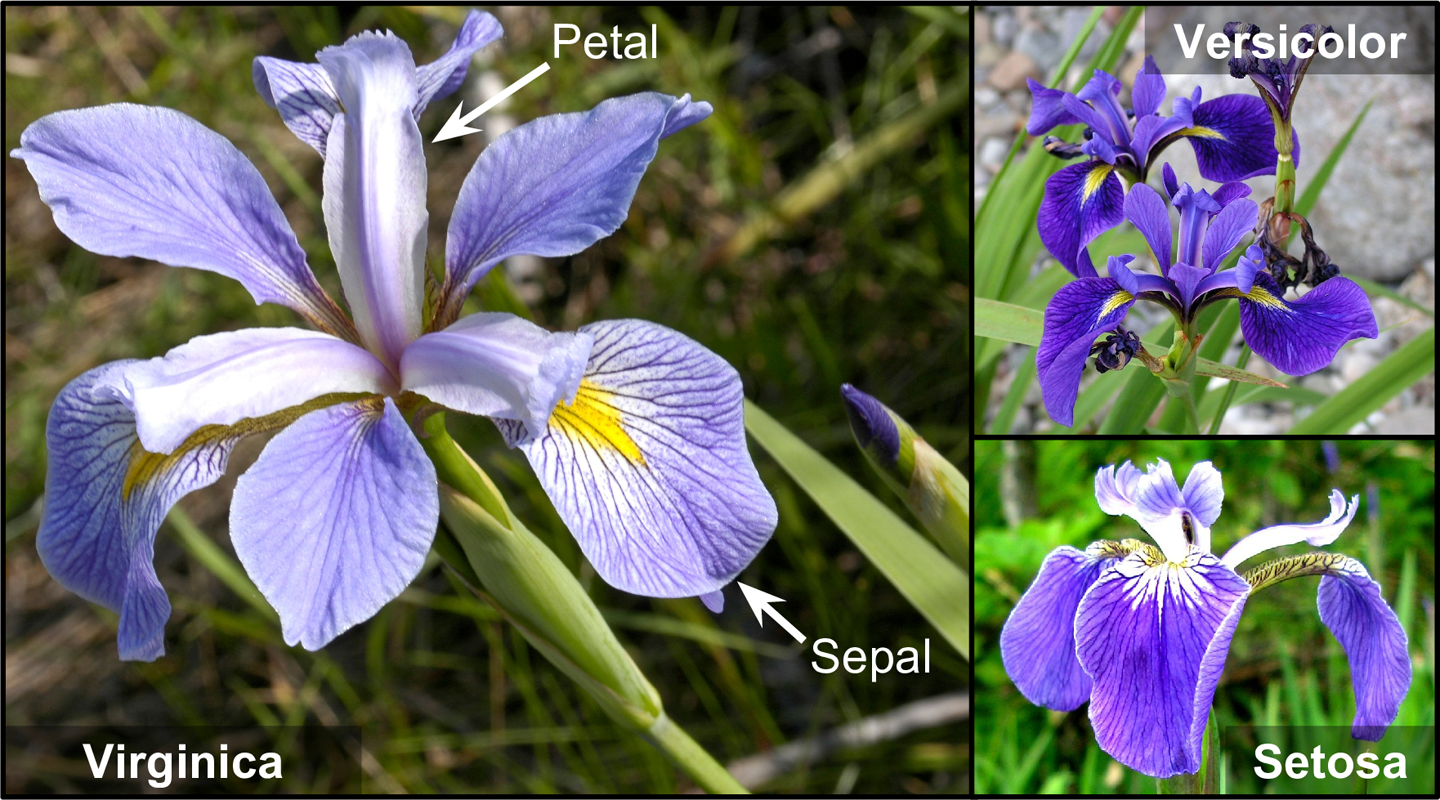

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

## Estimated probabilities and decision boundary


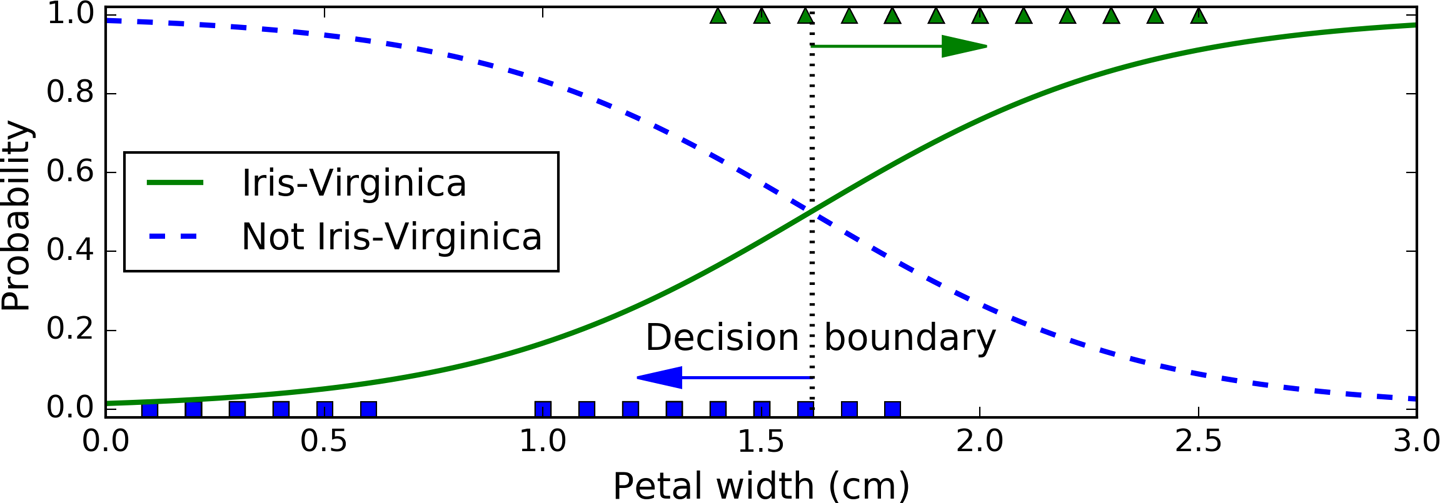

## Linear decision boundary
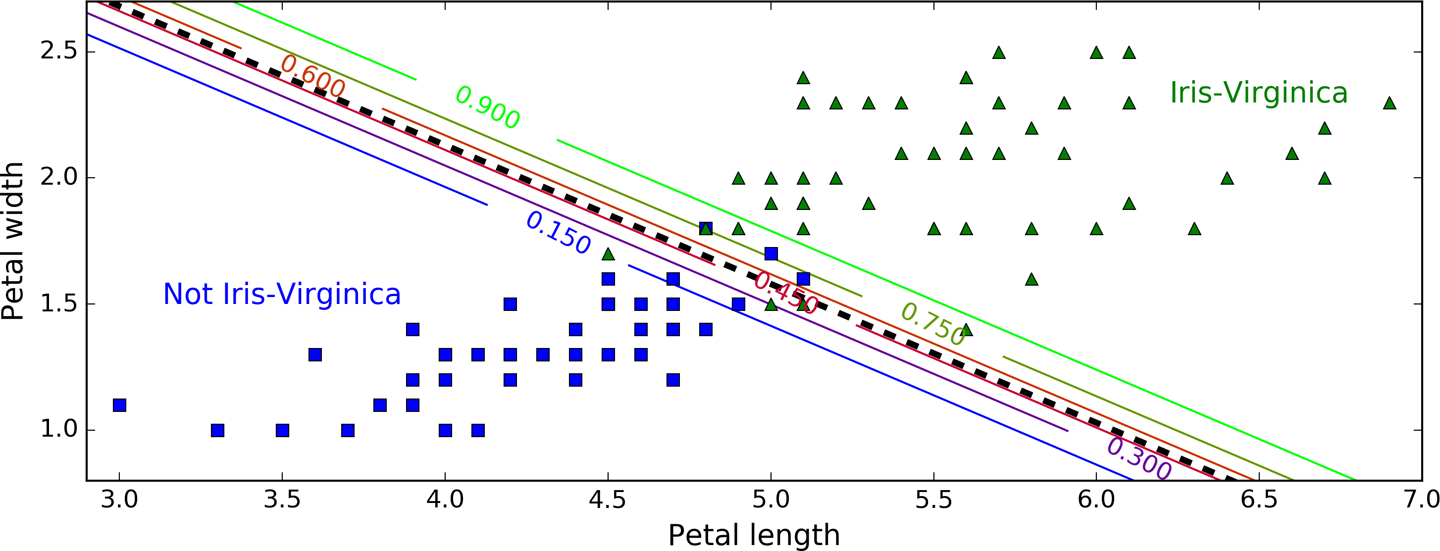


- The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.


<div class = "alert alert-info">
    
<h1>Softmax Regression</h1>
<p>The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.</p>
    

<ui><li>The idea is simple: when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.</li></ui>
</div>


## Softmax score for class k


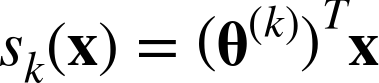

## Softmax function

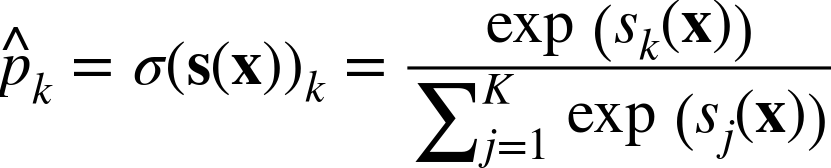


#### In this equation:
- K is the number of classes.
- s(x) is a vector containing the scores of each class for the instance x.
- σ(s(x))k is the estimated probability that the instance x belongs to class k, given the scores of each class for that instance

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

## Softmax Regression decision boundaries

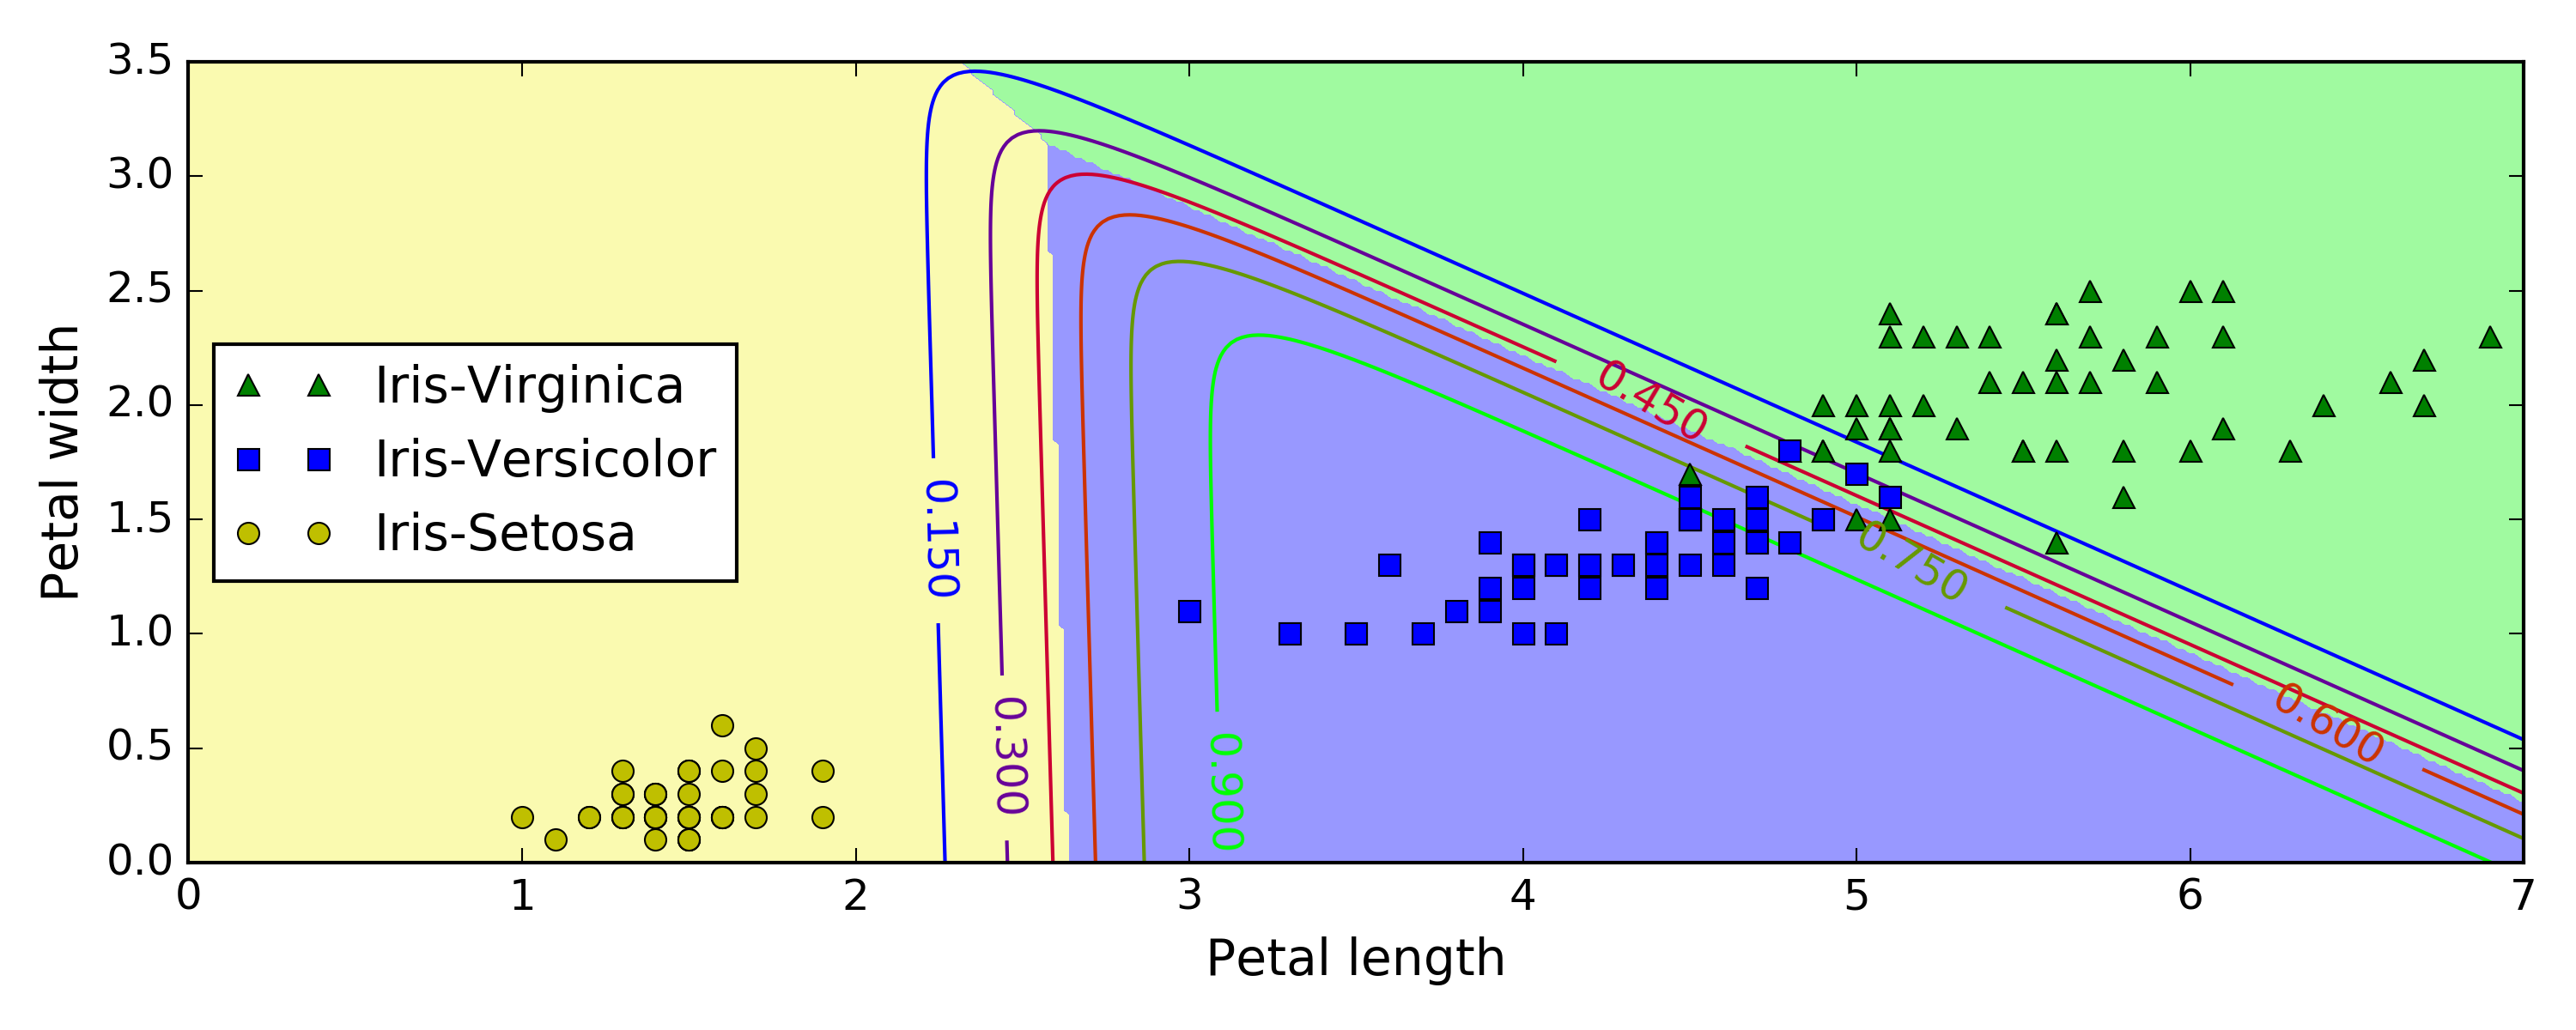

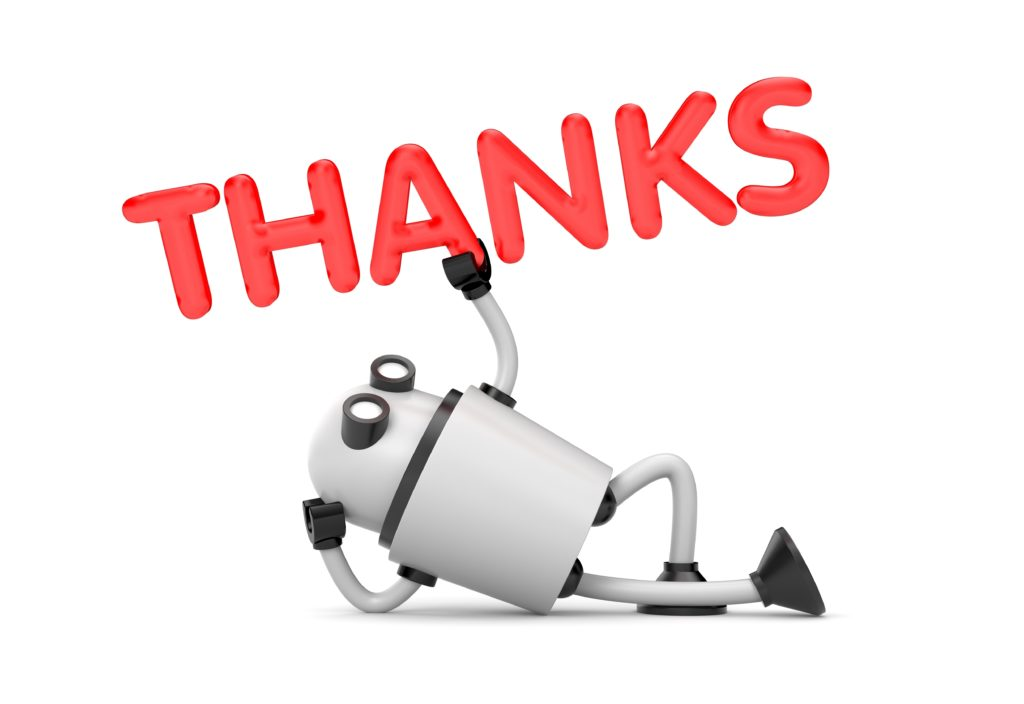